<a href="https://colab.research.google.com/github/ShannonH98/PyTorch_Practice_Projects/blob/main/MNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digits

In [209]:
#Import torch
import torch
from torch import nn
import torch.nn.functional as F


# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from torch import nn, optim
from torchvision.utils import make_grid

#ToTensor can take image data and turn it into tensor data
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")



PyTorch version: 2.8.0+cu126
torchvision version: 0.23.0+cu126


In [210]:
train_data = datasets.MNIST(
    root="data",
    train=True, #we want the training data set
    download=True, #we want to download
    transform=ToTensor(), #need to convert to tensor to be able to use it
    target_transform=None #do we want to transform the target/labels
)

#now do the same to test data

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True, #we want to download
    transform=ToTensor(), #need to convert to tensor to be able to use it
    target_transform=None
)

#This section dowloads the data needed for this model

In [211]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [212]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [213]:
len(test_data), len(train_data)

(10000, 60000)

In [214]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [215]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [216]:
from torch.utils.data import DataLoader
batch_size = 32
#turn imported dataset into a data loader
#reducing the amount of data to start with
train_loader = DataLoader(dataset=train_data,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_data,
                         batch_size=batch_size)

print(f"Dataloaders: {train_loader, test_loader}")
print(f"Length of train dataloader: {len(train_loader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_loader)} batches of {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d1a76e8ab40>, <torch.utils.data.dataloader.DataLoader object at 0x7d1a77da02c0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [217]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [218]:
image.shape, label

(torch.Size([1, 28, 28]), 5)

In [219]:
#color channel of 1, then height and width

In [220]:
image, label = next(iter(train_loader)) #iterates through the train data loader

print("Images shape:", image.shape)
print("Images type:", image.dtype)
print("Labels shape:", label.shape)
print("Labels type:", label.dtype)

Images shape: torch.Size([32, 1, 28, 28])
Images type: torch.float32
Labels shape: torch.Size([32])
Labels type: torch.int64


In [221]:
class_names[label[0]]

'7 - seven'

Image shape: torch.Size([1, 28, 28])


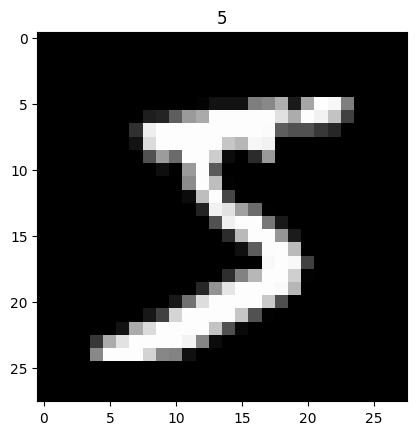

In [222]:
#Visualizing the Data
import matplotlib.pyplot as plt

image, label = train_data[0]#first value
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label);

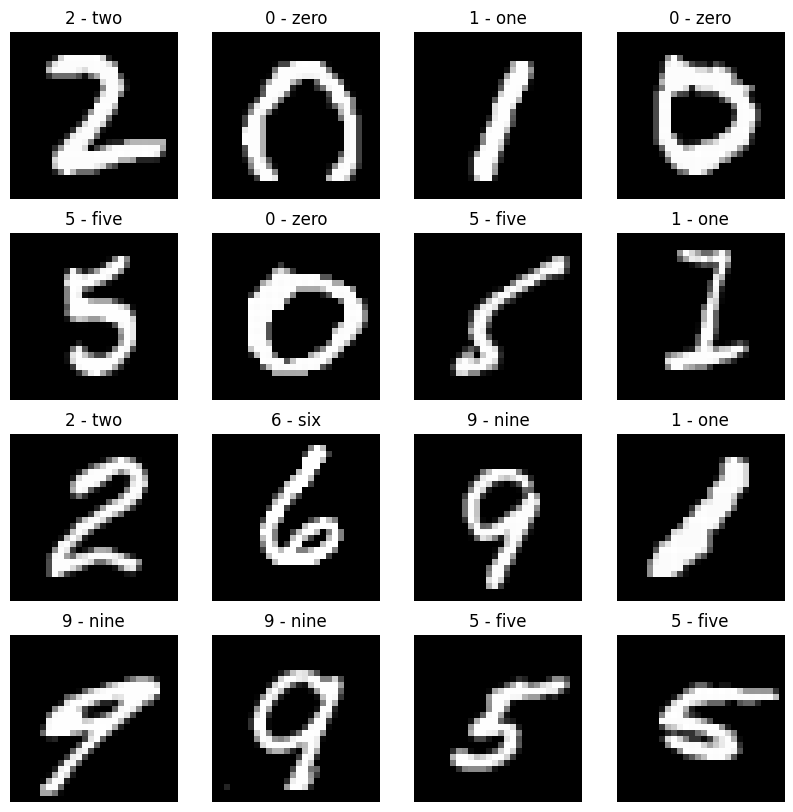

In [223]:
#torch.manual_seed(42)
fig = plt.figure(figsize=(10, 10))
rows, cols = 4,4
for i in range(1, rows*cols+1):

    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    fig.add_subplot(rows, cols, i)
    image, label = train_data[random_idx]
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [224]:
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 3, label size: torch.Size([])


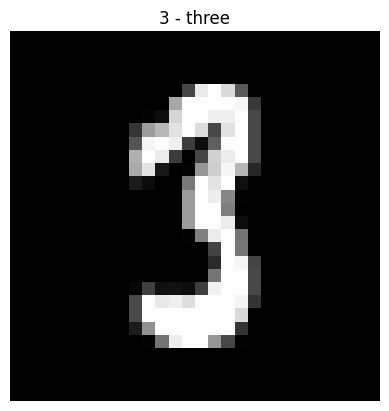

In [225]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [226]:
flatten_model = nn.Flatten()

x = train_features_batch[0] #forward pass gets performed

#Flatten the sample
output = flatten_model(x)
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [227]:
from torch import nn
class DigitClassifierv1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
      return self.layer_stack(x)


In [228]:
torch.manual_seed(42)

model_0 = DigitClassifierv1(
    input_shape=784,#result of the flatten layer
    hidden_units=10,
    output_shape=len(class_names)
)
model_0


DigitClassifierv1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [229]:
dummy_x = torch.rand([1,1,28,28]) #batch, color channel, height, width
model_0(dummy_x).shape

torch.Size([1, 10])

In [230]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [231]:
#import the previously built accuracy function
from helper_functions import accuracy_fn

#setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [232]:
#Track speed
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time



In [233]:
start_time = timer()

end_time = timer()
print_train_time(start=start_time, end=end_time, device=None)

Train time on None: 0.000 seconds


7.375800123554654e-05

In [234]:
from tqdm.auto import tqdm #progress bar

#Set the seed and start the timer

torch.manual_seed(42)
train_time_start_on_cpu = timer()

#set the number of epochs (we'll keep this small for faster training time)

epochs = 3

#create training and test loop

for epochs in tqdm(range(epochs)):
    print(f"Epoch: {epochs}\n-------")

    ###Training
    train_loss = 0

    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_loader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Viewed {batch * len(X)}/{len(train_loader.dataset)} samples")

    #Divide total train loss by lenght of train loader
    train_loss /= len(train_loader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_loader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_loader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_loader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Viewed 0/60000 samples
Viewed 12800/60000 samples
Viewed 25600/60000 samples
Viewed 38400/60000 samples
Viewed 51200/60000 samples

Train loss: 0.40511 | Test loss: 0.29516, Test acc: 91.67%

Epoch: 1
-------
Viewed 0/60000 samples
Viewed 12800/60000 samples
Viewed 25600/60000 samples
Viewed 38400/60000 samples
Viewed 51200/60000 samples

Train loss: 0.30842 | Test loss: 0.28621, Test acc: 91.95%

Epoch: 2
-------
Viewed 0/60000 samples
Viewed 12800/60000 samples
Viewed 25600/60000 samples
Viewed 38400/60000 samples
Viewed 51200/60000 samples

Train loss: 0.29602 | Test loss: 0.28627, Test acc: 91.89%

Train time on cpu: 27.980 seconds


In [235]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    "return a dictionary of model prediciton results "
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_loader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'DigitClassifierv1',
 'model_loss': 0.28626731038093567,
 'model_acc': 91.8929712460064}

Model 2

In [236]:
class DigitClassifierv2(nn.Module):
    def __init__(self):
        super(DigitClassifierv2, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input layer to hidden layer
        self.fc2 = nn.Linear(128, 10)     # Hidden layer to 10 output classes

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = F.relu(self.fc1(x))  # Apply ReLU activation
        return self.fc2(x)  # Output logits for 10 digits



In [237]:
torch.manual_seed(42)

model_1 = DigitClassifierv2()
model_1

DigitClassifierv2(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [238]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

In [239]:
# Training loop
from tqdm.auto import tqdm
torch.manual_seed(42)

epochs = 3

train_time_start_on_cpu = timer()
for epochs in tqdm(range(epochs)):  # Train for 3 epochs
  print(f"Epoch: {epochs}\n-------")
  for images, labels in train_loader:
    outputs = model_1(images)  # Forward pass
    loss = criterion(outputs, labels)  # Compute loss

    optimizer.zero_grad()  # Clear gradients
    loss.backward()        # Backpropagation
    optimizer.step()       # Update weights

    #print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
    #print(f"Viewed {batch * len(X)}/{len(train_loader.dataset)} samples")
# Evaluate model accuracy on test data
correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation for testing
    for images, labels in test_loader:
        outputs = model_1(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

acc2 = 100 * correct / total


train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Epoch: 1
-------
Epoch: 2
-------
Test Accuracy: 97.33%
Train time on cpu: 33.119 seconds


In [240]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    "return a dictionary of model prediciton results "
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc2}

# Calculate model 1 results on test dataset
model_1_results = eval_model(model=model_1, data_loader=test_loader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'DigitClassifierv2',
 'model_loss': 0.08688858151435852,
 'model_acc': 97.33}

Model 3

In [241]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [242]:
class DigitClassifierv3(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super(DigitClassifierv3, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),

        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [243]:
torch.manual_seed(42)

model_2 = DigitClassifierv3(input_shape = 784,
                            hidden_units = 0,
                            output_shape =len(class_names))
model_2

DigitClassifierv3(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=0, bias=True)
    (2): ReLU()
    (3): Linear(in_features=0, out_features=10, bias=True)
  )
)

In [244]:
model_2

DigitClassifierv3(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=0, bias=True)
    (2): ReLU()
    (3): Linear(in_features=0, out_features=10, bias=True)
  )
)

In [245]:
next(model_2.parameters()).device

device(type='cpu')

In [246]:
from helper_functions import accuracy_fn


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [247]:
from tqdm.auto import tqdm #progress bar

#Set the seed and start the timer

torch.manual_seed(42)
train_time_start_on_cpu = timer()

#set the number of epochs (we'll keep this small for faster training time)

epochs = 3

#create training and test loop

for epochs in tqdm(range(epochs)):
    print(f"Epoch: {epochs}\n-------")

    ###Training
    train_loss = 0

    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_loader):
        model_2.train()
        # 1. Forward pass
        y_pred = model_2(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Viewed {batch * len(X)}/{len(train_loader.dataset)} samples")

    #Divide total train loss by lenght of train loader
    train_loss /= len(train_loader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_2.eval()
    with torch.inference_mode():
        for X, y in test_loader:
            # 1. Forward pass
            test_pred = model_2(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))


        test_loss /= len(test_loader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_loader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Viewed 0/60000 samples
Viewed 12800/60000 samples
Viewed 25600/60000 samples
Viewed 38400/60000 samples
Viewed 51200/60000 samples

Train loss: 2.30190 | Test loss: 2.30143, Test acc: 11.351837060702875%

Epoch: 1
-------
Viewed 0/60000 samples
Viewed 12800/60000 samples
Viewed 25600/60000 samples
Viewed 38400/60000 samples
Viewed 51200/60000 samples

Train loss: 2.30182 | Test loss: 2.30217, Test acc: 11.351837060702875%

Epoch: 2
-------
Viewed 0/60000 samples
Viewed 12800/60000 samples
Viewed 25600/60000 samples
Viewed 38400/60000 samples
Viewed 51200/60000 samples

Train loss: 2.30185 | Test loss: 2.30191, Test acc: 11.351837060702875%

Train time on cpu: 26.999 seconds


In [248]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    "return a dictionary of model prediciton results "
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 2 results on test dataset
model_2_results = eval_model(model=model_2, data_loader=test_loader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'DigitClassifierv3',
 'model_loss': 2.3019094467163086,
 'model_acc': 11.351837060702875}

In [249]:
model_0_results, model_1_results,model_2_results

({'model_name': 'DigitClassifierv1',
  'model_loss': 0.28626731038093567,
  'model_acc': 91.8929712460064},
 {'model_name': 'DigitClassifierv2',
  'model_loss': 0.08688858151435852,
  'model_acc': 97.33},
 {'model_name': 'DigitClassifierv3',
  'model_loss': 2.3019094467163086,
  'model_acc': 11.351837060702875})

In [250]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results,model_2_results])
compare_results

,model_name,model_loss,model_acc
0,DigitClassifierv1,0.286267,91.892971
1,DigitClassifierv2,0.086889,97.330000
2,DigitClassifierv3,2.301909,11.351837


In [251]:
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1,total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,DigitClassifierv1,0.286267,91.892971,27.980064
1,DigitClassifierv2,0.086889,97.330000,33.119330
2,DigitClassifierv3,2.301909,11.351837,26.998847


Text(0.5, 23.52222222222222, 'Model Name')

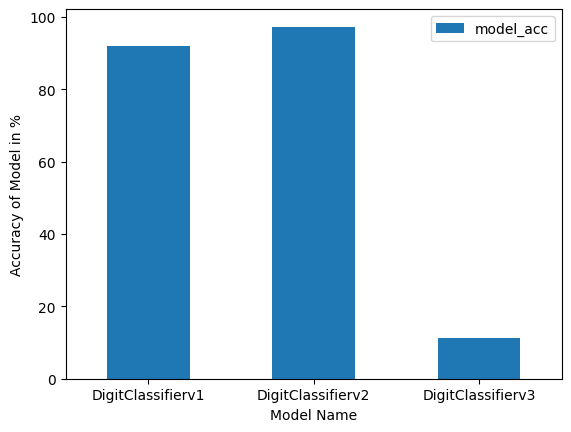

In [252]:
#Visualize
compare_results.plot.bar(x="model_name", y="model_acc", rot=0)
plt.savefig("model_acc_plot.png")
plt.ylabel("Accuracy of Model in %")
plt.xlabel("Model Name")